In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Fragebogen Kunden Studie zur Digitalisierung der Gastronomie durch die Coronapandemie.csv")
df = df.drop(columns=["Timestamp"])

df

,Was ist Ihr Geschlecht?,Bitte geben Sie Ihr Alter an,Welchen Abschluss besitzen Sie?,Wie viele Kinder haben Sie?,Was ist Ihr Beschäftigungsstatus?,Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?,Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?,Wie oft pro Monat nutzen Sie einen Lieferdienst?,Nutzten Sie vor Beginn der Coronakrise Lieferdienste?,"Nutzen Sie Lieferdienste seit Beginn der Coronapandemie öfter, seltener oder gleich oft wie zuvor?",...,"Ich nutze Takeaways, weil kein Lieferdienst verfügbar ist.","Ich nutze Kochboxen, weil ich wegen der Coronapandemie Einkäufe im Supermarkt vermeiden möchte.","Ich nutze Online-Lieferdienste, weil es bequem ist.","Ich nutze Online-Lieferdienste, weil es zeitsparend ist.","Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.","Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.","Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.",Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.,Ich finde das Homeoffice hat meine Essgewohnheiten verändert.,"Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen."
0,Männlich,24,Hauptschulabschluss,0,Schüler/Student,200,Ich arbeite im Homeoffice,2 mal pro Monat,Ja,Seltener,...,5,5,4,5,4,5,3,4,4,3
1,Weiblich,25,Bachelor,0,Schüler/Student,150,Ich arbeite im Homeoffice,30,Ja,Unverändert,...,3,1,5,5,5,1,3,2,4,3
2,Weiblich,28,Master,0,Vollzeit angestellt,250,Ich arbeite vor Ort,2,Ja,Unverändert,...,5,1,5,5,1,1,1,3,1,1
3,Weiblich,24,Bachelor,0,Schüler/Student,150,Ich arbeite vor Ort,2 - 3 mal,Ja,Unverändert,...,1,1,4,5,3,1,5,1,1,1
4,Weiblich,24,Master,0,Schüler/Student,€100 - €150,Ich arbeite im Homeoffice,1,Nein,Öfter,...,1,1,3,3,4,4,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Männlich,26,Bachelor,0,Schüler/Student,200,Ich arbeite im Homeoffice,4,Ja,Öfter,...,5,3,4,3,3,4,2,4,4,4
98,Weiblich,25,Abitur/Fachabitur,0,Schüler/Student,200,Ich arbeite im Homeoffice,1,Ja,Seltener,...,1,1,3,2,4,3,1,1,3,1
99,Weiblich,25,Bachelor,0,Schüler/Student,400,Ich arbeite im Homeoffice,4,Ja,Öfter,...,2,2,5,5,5,5,5,5,5,5
100,Männlich,25,abgeschlossene Berufsausbildung,0,Schüler/Student,300,Ich arbeite abwechselnd vor Ort und im Homeoffice,1-2,Ja,Unverändert,...,3,1,3,3,3,3,3,3,1,1


In [3]:
pd.options.display.max_columns = 999 
df.describe(include="all")

,Was ist Ihr Geschlecht?,Bitte geben Sie Ihr Alter an,Welchen Abschluss besitzen Sie?,Wie viele Kinder haben Sie?,Was ist Ihr Beschäftigungsstatus?,Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?,Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?,Wie oft pro Monat nutzen Sie einen Lieferdienst?,Nutzten Sie vor Beginn der Coronakrise Lieferdienste?,"Nutzen Sie Lieferdienste seit Beginn der Coronapandemie öfter, seltener oder gleich oft wie zuvor?",Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?,Auf welche Art bestellen Sie?,Seit Beginn der Coronakrise nutze Ich das Internet häufiger um mir Essen zu bestellen.,"Zu welcher bestimmten Essenszeiten benutzen Sie Lieferdienste am häufigsten, um Ihr Essen zu bestellen?",Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?,Wie oft pro Monat nutzen Sie Takeaways?,Nutzten Sie vor Beginn der Coronakrise Takeaways?,"Nutzen Sie seit Beginn der Coronakrise häufiger, seltener oder gleich oft Takeaways?",Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?,Sind Sie nach der Lockerung der Coronamaßnahmen im späten Frühling bzw. Sommer wieder häufiger ins Restaurant gegangen anstatt Essen zu bestellen?,Können Sie sich vorstellen nach der Coronapandemie wieder öfter in Restaurants essen zu gehen?,"Denken Sie, dass die Nutzung der Lieferdienste während der Coronapandemie einen dauerhaften Effekt auf das Konsumverhalten im Bereich Gastronomie haben wird?","Ich nutze Takeaways, weil kein Lieferdienst verfügbar ist.","Ich nutze Kochboxen, weil ich wegen der Coronapandemie Einkäufe im Supermarkt vermeiden möchte.","Ich nutze Online-Lieferdienste, weil es bequem ist.","Ich nutze Online-Lieferdienste, weil es zeitsparend ist.","Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.","Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.","Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.",Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.,Ich finde das Homeoffice hat meine Essgewohnheiten verändert.,"Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen."
count,100,102,102,102,102,101,102,102,102,102,102,102,102,102,102,102,102,102,102.000000,102,102,102,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
unique,2,29,7,5,6,40,3,46,2,3,3,15,2,2,3,43,2,3,NaN,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Weiblich,25,Bachelor,0,Schüler/Student,200,Ich arbeite im Homeoffice,1,Ja,Unverändert,Vorwiegend größere Online-Lieferdienste,Apps,Ja,Abendessen,Ich bin auf bargeldlose Bezahlung umgestiegen,1,Ja,Gleich oft,NaN,Ja,Ja,"Ja, Essen liefern lassen wird weiterhin belieb...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,62,14,41,85,62,17,60,16,78,49,43,25,53,86,52,13,76,45,NaN,43,82,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.078431,NaN,NaN,NaN,2.735294,1.794118,4.058824,3.696078,3.274510,2.656863,2.656863,2.647059,2.960784,2.401961
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.287305,NaN,NaN,NaN,1.448293,1.137465,1.192580,1.249073,1.408298,1.424642,1.492523,1.287003,1.572798,1.457380
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.250000,1.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,3.000000,1.000000,4.000000,4.000000,3.000000,2.500000,3.000000,3.000000,3.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,

## 1. Preprocessing

#### Drop unused Variables

In [4]:
df.columns.values

array(['Was ist Ihr Geschlecht?', 'Bitte geben Sie Ihr Alter an',
       'Welchen Abschluss besitzen Sie?', 'Wie viele Kinder haben Sie?',
       'Was ist Ihr Beschäftigungsstatus?',
       'Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?',
       'Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?',
       'Wie oft pro Monat nutzen Sie einen Lieferdienst?',
       'Nutzten Sie vor Beginn der Coronakrise Lieferdienste?',
       'Nutzen Sie Lieferdienste seit Beginn der Coronapandemie öfter, seltener oder gleich oft wie zuvor?',
       'Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?',
       'Auf welche Art bestellen Sie?',
       'Seit Beginn der Coronakrise nutze Ich das Internet häufiger um mir Essen zu bestellen.',
       'Zu welcher bestimmten Essenszeiten benutzen Sie Lieferdienste am häufigsten, um Ihr Essen zu bestellen?',
       'Hat sich Ihr Zahlungsverhalten im Zuge der Krise und d

In [5]:
raw_data = df.drop(["Nutzten Sie vor Beginn der Coronakrise Lieferdienste?",
              "Nutzen Sie Lieferdienste seit Beginn der Coronapandemie öfter, seltener oder gleich oft wie zuvor?",
             "Nutzten Sie vor Beginn der Coronakrise Takeaways?",
             "Nutzen Sie seit Beginn der Coronakrise häufiger, seltener oder gleich oft Takeaways?",
             "Können Sie sich vorstellen nach der Coronapandemie wieder öfter in Restaurants essen zu gehen?",
             "Denken Sie, dass die Nutzung der Lieferdienste während der Coronapandemie einen dauerhaften Effekt auf das Konsumverhalten im Bereich Gastronomie haben wird? ",
             "Ich nutze Takeaways, weil kein Lieferdienst verfügbar ist.",
             "Ich nutze Kochboxen, weil ich wegen der Coronapandemie Einkäufe im Supermarkt vermeiden möchte."], axis=1)

In [6]:
raw_data.columns.values

array(['Was ist Ihr Geschlecht?', 'Bitte geben Sie Ihr Alter an',
       'Welchen Abschluss besitzen Sie?', 'Wie viele Kinder haben Sie?',
       'Was ist Ihr Beschäftigungsstatus?',
       'Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?',
       'Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?',
       'Wie oft pro Monat nutzen Sie einen Lieferdienst?',
       'Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?',
       'Auf welche Art bestellen Sie?',
       'Seit Beginn der Coronakrise nutze Ich das Internet häufiger um mir Essen zu bestellen.',
       'Zu welcher bestimmten Essenszeiten benutzen Sie Lieferdienste am häufigsten, um Ihr Essen zu bestellen?',
       'Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?',
       'Wie oft pro Monat nutzen Sie Takeaways?',
       'Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?',
       'Sind Sie nac

In [7]:
columns_name = ['Was ist Ihr Geschlecht?', 'Bitte geben Sie Ihr Alter an',
       'Welchen Abschluss besitzen Sie?', 'Wie viele Kinder haben Sie?',
       'Was ist Ihr Beschäftigungsstatus?',
       'Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?',
       'Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?',
       'Wie oft pro Monat nutzen Sie einen Lieferdienst?',
       'Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?',
       'Auf welche Art bestellen Sie?',
       'Seit Beginn der Coronakrise nutze Ich das Internet häufiger um mir Essen zu bestellen.',
       'Zu welcher bestimmten Essenszeiten benutzen Sie Lieferdienste am häufigsten, um Ihr Essen zu bestellen?',
       'Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?',
       'Wie oft pro Monat nutzen Sie Takeaways?',
       'Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?',
       'Sind Sie nach der Lockerung der Coronamaßnahmen im späten Frühling bzw. Sommer wieder häufiger ins Restaurant gegangen anstatt Essen zu bestellen?',
       'Ich nutze Online-Lieferdienste, weil es bequem ist.',
       'Ich nutze Online-Lieferdienste, weil es zeitsparend ist.',
       'Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.',
       'Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.',
       'Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.',
       'Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.',
       'Ich finde das Homeoffice hat meine Essgewohnheiten verändert.',
       'Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen.']

In [8]:
raw_data.columns = columns_name

In [9]:
columns_name_reordered = ['Was ist Ihr Geschlecht?', 'Bitte geben Sie Ihr Alter an',
       'Welchen Abschluss besitzen Sie?', 'Wie viele Kinder haben Sie?',
       'Was ist Ihr Beschäftigungsstatus?',
       'Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?',
       'Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?',
       'Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?',
       'Auf welche Art bestellen Sie?',
       'Seit Beginn der Coronakrise nutze Ich das Internet häufiger um mir Essen zu bestellen.',
       'Zu welcher bestimmten Essenszeiten benutzen Sie Lieferdienste am häufigsten, um Ihr Essen zu bestellen?',
       'Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?',
       'Wie oft pro Monat nutzen Sie Takeaways?',
       'Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?',
       'Sind Sie nach der Lockerung der Coronamaßnahmen im späten Frühling bzw. Sommer wieder häufiger ins Restaurant gegangen anstatt Essen zu bestellen?',
       'Ich nutze Online-Lieferdienste, weil es bequem ist.',
       'Ich nutze Online-Lieferdienste, weil es zeitsparend ist.',
       'Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.',
       'Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.',
       'Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.',
       'Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.',
       'Ich finde das Homeoffice hat meine Essgewohnheiten verändert.',
       'Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen.',
        'Wie oft pro Monat nutzen Sie einen Lieferdienst?',]

In [10]:
raw_data = raw_data[columns_name_reordered]

#### Dealing with missing values

In [11]:
raw_data.isnull().sum()

Was ist Ihr Geschlecht?                                                                                                                               2
Bitte geben Sie Ihr Alter an                                                                                                                          0
Welchen Abschluss besitzen Sie?                                                                                                                       0
Wie viele Kinder haben Sie?                                                                                                                           0
Was ist Ihr Beschäftigungsstatus?                                                                                                                     0
Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?                                                                                       1
Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?                                

In [12]:
raw_data = raw_data.dropna(axis= 0, how="any")

#### Word to number

In [13]:
pd.options.display.max_rows = 999 
raw_data["Wie oft pro Monat nutzen Sie einen Lieferdienst?"]

0                  2 mal pro Monat 
1                                30
2                                 2
3                         2 - 3 mal
4                                 1
5                               2-3
6                                 1
7                               1-2
8                                 0
9                             kaum 
10                         Mind. 1x
11                                3
12                      Ca. 2-3 mal
13                                4
14                                0
15                             2-3 
16                                1
17                              10x
18                            3 mal
19                                5
20                Dreimal pro Monat
21                                2
22                                8
23                             3-4 
24                              Nul
25                           Selten
26                                4
27                          

In [14]:
raw_data["Wie oft pro Monat nutzen Sie einen Lieferdienst?"].replace({"2 mal pro Monat ": "2",
                                                                      "2 - 3 mal": "3",
                                                                     "2-3": "3",
                                                                     "1-2": "2",
                                                                     "kaum ": "1",
                                                                     "Mind. 1x": "1",
                                                                     "Ca. 2-3 mal": "3",
                                                                     "2-3 ": "3",
                                                                     "10x": "10",
                                                                     "3 mal": "3",
                                                                     "Dreimal pro Monat": "3",
                                                                     "3-4 ": "4",
                                                                     "Nul": "0",
                                                                     "Selten": "2",
                                                                     "1-2 mal" : "2",
                                                                     "3-7": "5",
                                                                     "Ca. 4-6×": "5",
                                                                     "1-3 mal pro woche": "8",
                                                                     "1-3 Mal": "2",
                                                                     "Sehr oft": "8",
                                                                     "Kaum": "1",
                                                                     "3 Mal": "3",
                                                                     "2-3 mal": "3",
                                                                      "2-3 Mal": "3",
                                                                      "2-10" : "6",
                                                                     "0-2": "1",
                                                                      "Nie (0 mal)": "0",
                                                                      "nicht so oft" : "2",
                                                                      "0 -1 Mal" : "0.5",
                                                                      "Maximal ein Mal pro Monat" : "0.5",
                                                                     "6-8": "7",
                                                                      "0-1 mal" : "0.5",
                                                                     "0,5 (einmal in zwei Monaten)": "0.5",
                                                                      "0,5" : "0.5",
                                                                      "höchstens einmal" : "0.5",
                                                                     }, inplace=True)
raw_data["Wie oft pro Monat nutzen Sie einen Lieferdienst?"] = raw_data["Wie oft pro Monat nutzen Sie einen Lieferdienst?"].astype("float")

In [15]:
raw_data["Wie oft pro Monat nutzen Sie einen Lieferdienst?"]

0       2.0
1      30.0
2       2.0
3       3.0
4       1.0
5       3.0
6       1.0
7       2.0
8       0.0
9       1.0
10      1.0
11      3.0
12      3.0
13      4.0
14      0.0
15      3.0
16      1.0
17     10.0
18      3.0
19      5.0
20      3.0
21      2.0
22      8.0
23      4.0
24      0.0
25      2.0
26      4.0
27      0.0
28      3.0
29      5.0
30      2.0
31      2.0
32      5.0
33      5.0
34      8.0
35      2.0
36      8.0
37      0.0
38      1.0
39      2.0
40      3.0
41      1.0
42      2.0
43      0.0
44      6.0
45      1.0
46      2.0
47      3.0
48      8.0
49      1.0
50      3.0
51      2.0
52     10.0
53      2.0
54      3.0
55      3.0
56      2.0
57      5.0
58      8.0
59      2.0
60      1.0
61      2.0
62      0.0
63      4.0
64      2.0
65      7.0
66      1.0
67      7.0
68      0.5
69      5.0
70      0.0
71      0.0
73      3.0
74      2.0
75      2.0
76      0.0
77      6.0
78      1.0
79      0.0
80      2.0
81      2.0
82      0.5
83      0.5
84  

In [16]:
raw_data["Wie oft pro Monat nutzen Sie Takeaways?"]

0                                        3 mal pro Monat
1                                                    2-3
2                                                      8
3                                                2-3 mal
4                                                      1
5                                                    4-5
6                                                      4
7                                                    1-2
8                                                2-3 mal
9                                                      3
10                                              Mind. 1x
11                                                     4
12                                               0-1 mal
13                                                     1
14                                                     1
15                                                   1-2
16                                                     1
17                             

In [17]:
raw_data["Wie oft pro Monat nutzen Sie Takeaways?"].replace({"2 mal pro Monat ": "2",
                                                                      "2 - 3 mal": "3",
                                                                     "2-3": "3",
                                                                     "1-2": "2",
                                                                     "kaum ": "2",
                                                                     "Mind. 1x": "1",
                                                                     "Ca. 2-3 mal": "3",
                                                                     "2-3 ": "3",
                                                                     "10x": "10",
                                                                     "3 mal": "3",
                                                                     "Dreimal pro Monat": "3",
                                                                     "3-4 ": "4",
                                                                     "Nul": "0",
                                                                     "Selten": "3",
                                                                     "1-2 mal" : "2",
                                                                     "3-7": "5",
                                                                     "Ca. 4-6×": "5",
                                                                     "1-3 mal pro woche": "8",
                                                                     "1-3 Mal": "2",
                                                                     "Sehr oft": "9",
                                                                     "Kaum": "2",
                                                                     "3 Mal": "3",
                                                                     "2-3 mal": "3",
                                                                     "0-2": "1",
                                                                     "6-8": "7",
                                                                     "0,5 (einmal in zwei Monaten)": "0.5",
                                                             "3 mal pro Monat": "3",
                                                             "4-5x": "5",
                                                             "4 mal": "4",
                                                             "0-1 mal": "0.5",
                                                             "4-5": "5",
                                                             "1x": "1",
                                                             "5x ": "5",
                                                             "Seit Dem Lockdown 4 Mal im Monat": "4",
                                                             "mehr als 5 Mal": "6",
                                                             "6 mal": "6",
                                                             "2~3": "3",
                                                             "4-5×": "5",
                                                             "8-10": "9",
                                                             "1-3 Mal ": "2",
                                                             "3-4": "4",
                                                             "0-1": "0.5",
                                                             "2-4": "3",
                                                             "7-8 mal pro monat": "8",
                                                             "Alle 2 oder 3 Monate 1 mal": "0.5",
                                                             "2mal":"2",
                                                             "Fast nie" : "1",
                                                             "1-10" : "5",
                                                             "Vielleicht einmal im Vierteljahr (0,33 Mal pro Monat)" : "0.33",
                                                             "nicht oft" : "3",
                                                             "6 Mal" : "6",
                                                             "Maximal ein Mal pro Monat" : "0.5",
                                                             "höchstens einmal": "0.5"
                                                                     }, inplace=True)
raw_data["Wie oft pro Monat nutzen Sie Takeaways?"] = raw_data["Wie oft pro Monat nutzen Sie Takeaways?"].astype("float")

In [18]:
raw_data["Wie oft pro Monat nutzen Sie Takeaways?"]

0       3.00
1       3.00
2       8.00
3       3.00
4       1.00
5       5.00
6       4.00
7       2.00
8       3.00
9       3.00
10      1.00
11      4.00
12      0.50
13      1.00
14      1.00
15      2.00
16      1.00
17      1.00
18      4.00
19      3.00
20      3.00
21      2.00
22     10.00
23      4.00
24      6.00
25      3.00
26      4.00
27      8.00
28      0.00
29      3.00
30      0.00
31      3.00
32      3.00
33      5.00
34      9.00
35      2.00
36      9.00
37      0.00
38      1.00
39      5.00
40      3.00
41      4.00
42      2.00
43      0.00
44      5.00
45      5.00
46      4.00
47      6.00
48      8.00
49      5.00
50      1.00
51      3.00
52      5.00
53      1.00
54      0.00
55      0.50
56      1.00
57      4.00
58      0.00
59      3.00
60      3.00
61      5.00
62      2.00
63      0.00
64      2.00
65      1.00
66      0.50
67      3.00
68      2.00
69      5.00
70      4.00
71      2.00
73      1.00
74      2.00
75      4.00
76      2.00
77      5.00

#### Alter

In [19]:
raw_data["Bitte geben Sie Ihr Alter an"] = raw_data["Bitte geben Sie Ihr Alter an"].replace({"35)": "35"}).replace({"Neunzehn": "19"})

raw_data["Bitte geben Sie Ihr Alter an"] = raw_data["Bitte geben Sie Ihr Alter an"].astype("int32")

In [20]:
raw_data["Bitte geben Sie Ihr Alter an"]

0      24
1      25
2      28
3      24
4      24
5      41
6      32
7      25
8      20
9      20
10     29
11     22
12     22
13     32
14     27
15     25
16     48
17     30
18     35
19     26
20     25
21     32
22     39
23     34
24     45
25     28
26     42
27     22
28     24
29     28
30     22
31     26
32     21
33     36
34     36
35     29
36     24
37     23
38     31
39     37
40     24
41     23
42     20
43     21
44     28
45     31
46     26
47     27
48     28
49     33
50     27
51     21
52     36
53     24
54     23
55     25
56     21
57     23
58     30
59     21
60     22
61     22
62     25
63     30
64     25
65     24
66     24
67     66
68     21
69     27
70     27
71     35
73     25
74     45
75     20
76     32
77     22
78     25
79     24
80     24
81     23
82     24
83     19
84     19
85     21
88     21
89     40
90     23
91     38
92     20
93     22
94     28
95     24
96     25
97     26
98     25
99     25
100    25
101    21
Name: Bitt

#### Geld für Lebensmittel mont.

In [21]:
raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?']

0                                 200
1                                 150
2                                 250
3                                 150
4                         €100 - €150
5                                 500
6                                2500
7                                  50
8                                 250
9                             80 Euro
10                           Ca. 400€
11                                400
12                                300
13                                200
14                                200
15                                200
16                                500
17                                500
18                               700€
19                              150 €
20                                 65
21                               1000
22                                500
23                      1000-1500 EUR
24                               400€
25                           200-300€
26          

In [22]:
raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'] = raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'].replace({"€100 - €150": "125",
                                                                                    "80 Euro": "80",
                                                                                    "Ca. 400€": "400",
                                                                                    "700€": "700",
                                                                                    "150 €": "150",
                                                                                    "1000-1500 EUR": "1250",
                                                                                    "400€":"400",
                                                                                    "200-300€" : "250",
                                                                                    "150-200" : "175",
                                                                                    "200-250" : "225",
                                                                                    "150€" : "150",
                                                                                    "500€" : "500",
                                                                                    "100-150€" : "125",
                                                                                    "1500€" : "1500",
                                                                                    "400€" : "400",
                                                                                    "150€" : "150",
                                                                                    "180€" : "180",
                                                                                    "250€": "250",
                                                                                    "100€ pP": "100",
                                                                                    "mehr als 50 €": "70",
                                                                                    "Zwischen null und zwanzig Euro": "10",
                                                                                    "150-200€" : "175",
                                                                                    "€150" : "150"})

raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'] = raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'].astype("float")

In [23]:
raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?']

0       200.0
1       150.0
2       250.0
3       150.0
4       125.0
5       500.0
6      2500.0
7        50.0
8       250.0
9        80.0
10      400.0
11      400.0
12      300.0
13      200.0
14      200.0
15      200.0
16      500.0
17      500.0
18      700.0
19      150.0
20       65.0
21     1000.0
22      500.0
23     1250.0
24      400.0
25      250.0
26      200.0
27      175.0
28      225.0
29      500.0
30       80.0
31      150.0
32      100.0
33      500.0
34      900.0
35      300.0
36      200.0
37        0.0
38      500.0
39      500.0
40      300.0
41      200.0
42      125.0
43      150.0
44      300.0
45      200.0
46      150.0
47      300.0
48     1500.0
49      800.0
50      150.0
51      160.0
52      300.0
53      100.0
54      200.0
55      150.0
56      300.0
57      400.0
58      500.0
59      160.0
60      100.0
61      150.0
62      100.0
63      300.0
64      150.0
65      300.0
66      150.0
67      700.0
68      180.0
69      200.0
70      300.0
71    

## 2. Exploring Data

#### Lieferdienst

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


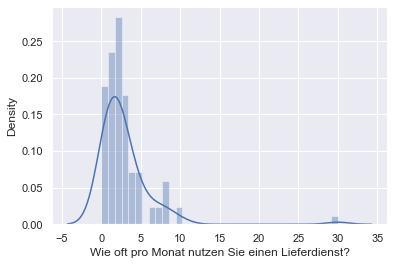

In [24]:
sns.distplot(raw_data["Wie oft pro Monat nutzen Sie einen Lieferdienst?"])

#### Eliminate outlier

In [25]:
q = raw_data["Wie oft pro Monat nutzen Sie einen Lieferdienst?"].quantile(0.99)
data_1 = raw_data[raw_data["Wie oft pro Monat nutzen Sie einen Lieferdienst?"]<q]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


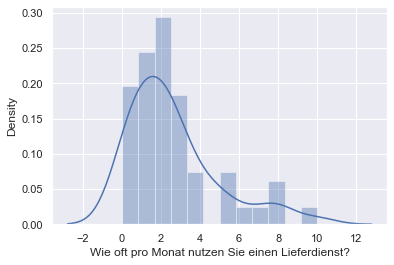

In [26]:
sns.distplot(data_1["Wie oft pro Monat nutzen Sie einen Lieferdienst?"])

#### Takeaway

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


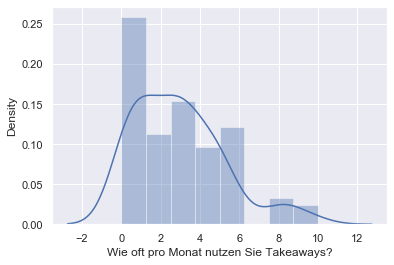

In [27]:
sns.distplot(raw_data["Wie oft pro Monat nutzen Sie Takeaways?"])

#### Alter


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


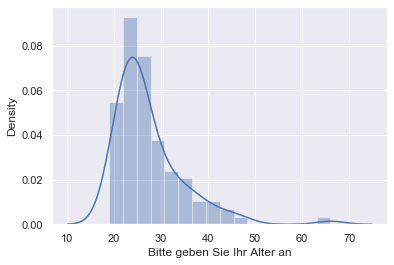

In [28]:
sns.distplot(raw_data["Bitte geben Sie Ihr Alter an"])

#### Monatliche Geldausgabe für Lebensmittel

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


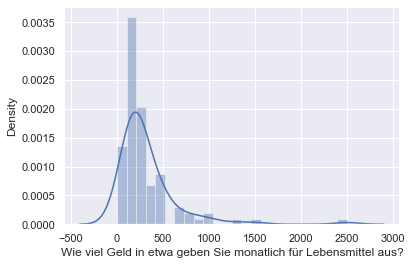

In [29]:
sns.distplot(raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'])

#### Eliminate the outliers

In [30]:
q = raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'].quantile(0.99)
data_2 = raw_data[raw_data['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?']<q]

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


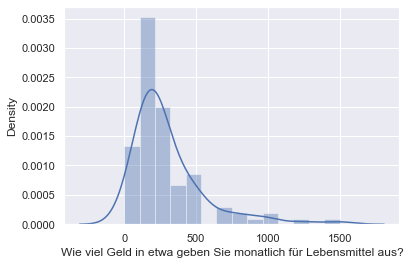

In [31]:
sns.distplot(data_2['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'])

##### Checkpoint data

In [32]:
data_cleaned = data_2.reset_index(drop=True)

## 3. Check the OLS Assumption

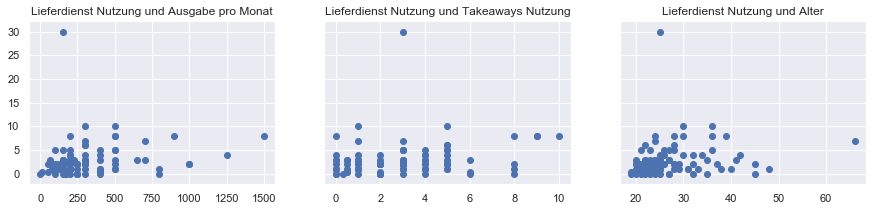

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'], data_cleaned["Wie oft pro Monat nutzen Sie einen Lieferdienst?"])
ax1.set_title("Lieferdienst Nutzung und Ausgabe pro Monat")
ax2.scatter(data_cleaned["Wie oft pro Monat nutzen Sie Takeaways?"], data_cleaned["Wie oft pro Monat nutzen Sie einen Lieferdienst?"])
ax2.set_title("Lieferdienst Nutzung und Takeaways Nutzung")
ax3.scatter(data_cleaned["Bitte geben Sie Ihr Alter an"], data_cleaned["Wie oft pro Monat nutzen Sie einen Lieferdienst?"])
ax3.set_title("Lieferdienst Nutzung und Alter")

plt.show()

### Relaxing the assumption 

In [34]:
#log_lieferdienst_nutzung = np.log(data_cleaned["Wie oft pro Monat nutzen Sie einen Lieferdienst?"])
#data_cleaned["log_lieferdienst_nutzung"] = log_lieferdienst_nutzung
#data_cleaned

In [35]:
"""f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))
ax1.scatter(data_cleaned['Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?'], data_cleaned["log_lieferdienst_nutzung"])
ax1.set_title("Log Lieferdienst Nutzung und Ausgabe pro Monat")
ax2.scatter(data_cleaned["Wie oft pro Monat nutzen Sie Takeaways?"], data_cleaned["log_lieferdienst_nutzung"])
ax2.set_title("Log Lieferdienst Nutzung und Takeaways Nutzung")
ax3.scatter(data_cleaned["Bitte geben Sie Ihr Alter an"], data_cleaned["log_lieferdienst_nutzung"])
ax3.set_title("Log Lieferdienst Nutzung und Alter")

plt.show()"""

'f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (15,3))\nax1.scatter(data_cleaned[\'Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?\'], data_cleaned["log_lieferdienst_nutzung"])\nax1.set_title("Log Lieferdienst Nutzung und Ausgabe pro Monat")\nax2.scatter(data_cleaned["Wie oft pro Monat nutzen Sie Takeaways?"], data_cleaned["log_lieferdienst_nutzung"])\nax2.set_title("Log Lieferdienst Nutzung und Takeaways Nutzung")\nax3.scatter(data_cleaned["Bitte geben Sie Ihr Alter an"], data_cleaned["log_lieferdienst_nutzung"])\nax3.set_title("Log Lieferdienst Nutzung und Alter")\n\nplt.show()'

In [36]:
#data_cleaned = data_cleaned.drop(["Wie oft pro Monat nutzen Sie einen Lieferdienst?"], axis =1)

### Multicolinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?",
                          "Wie oft pro Monat nutzen Sie Takeaways?", "Bitte geben Sie Ihr Alter an"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [38]:
vif

,VIF,features
0,3.297923,Wie viel Geld in etwa geben Sie monatlich für ...
1,2.820059,Wie oft pro Monat nutzen Sie Takeaways?
2,4.232452,Bitte geben Sie Ihr Alter an


1 < VIF < 5 = Alles in Ordnung

## 4. Create Dummy Variables

In [39]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)

In [40]:
data_with_dummies.head()

,Bitte geben Sie Ihr Alter an,Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?,Wie oft pro Monat nutzen Sie Takeaways?,Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?,"Ich nutze Online-Lieferdienste, weil es bequem ist.","Ich nutze Online-Lieferdienste, weil es zeitsparend ist.","Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.","Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.","Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.",Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.,Ich finde das Homeoffice hat meine Essgewohnheiten verändert.,"Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen.",Wie oft pro Monat nutzen Sie einen Lieferdienst?,Was ist Ihr Geschlecht?_Weiblich,Welchen Abschluss besitzen Sie?_Bachelor,Welchen Abschluss besitzen Sie?_Doktor oder höher,Welchen Abschluss besitzen Sie?_Hauptschulabschluss,Welchen Abschluss besitzen Sie?_Master,Welchen Abschluss besitzen Sie?_Mittlere Reife,Welchen Abschluss besitzen Sie?_abgeschlossene Berufsausbildung,Wie viele Kinder haben Sie?_1,Wie viele Kinder haben Sie?_2,Wie viele Kinder haben Sie?_4,Wie viele Kinder haben Sie?_Keine Angabe,Was ist Ihr Beschäftigungsstatus?_In Rente,Was ist Ihr Beschäftigungsstatus?_Schüler/Student,Was ist Ihr Beschäftigungsstatus?_Selbstständig,Was ist Ihr Beschäftigungsstatus?_Teilzeit angestellt,Was ist Ihr Beschäftigungsstatus?_Vollzeit angestellt,Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?_Ich arbeite im Homeoffice,Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?_Ich arbeite vor Ort,Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?_Vorwiegend größere Online-Lieferdienste,Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?_Vorwiegend hauseigene Lieferdienste der Restaurants,Auf welche Art bestellen Sie?_Apps;Ich bestelle lieber vor Ort,Auf welche Art bestellen Sie?_Ich bestelle lieber vor Ort,Auf welche Art bestellen Sie?_Telefon,Auf welche Art bestellen Sie?_Telefon;Apps,Auf welche Art bestellen Sie?_Telefon;Apps;Ich bestelle lieber vor Ort,Auf welche Art bestellen Sie?_Telefon;Ich bestelle lieber vor Ort,Auf welche Art bestellen Sie?_Telefon;Website,Auf welche Art bestellen Sie?_Telefon;Website;Apps,Auf welche Art bestellen Sie?_Telefon;Website;Apps;Ich bestelle lieber vor Ort,Auf welche Art bestellen Sie?_Telefon;Website;Ich bestelle lieber vor Ort,Auf welche Art bestellen Sie?_Website,Auf welche Art bestellen Sie?_Website;Apps,Auf welche Art bestellen Sie?_Website;Apps;Ich bestelle lieber vor Ort,Auf welche Art bestellen Sie?_Website;Ich bestelle lieber vor Ort,Seit Beginn der Coronakrise nutze Ich das Internet häufiger um mir Essen zu bestellen._Nein,"Zu welcher bestimmten Essenszeiten benutzen Sie Lieferdienste am häufigsten, um Ihr Essen zu bestellen?_Mittagessen",Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?_Ich nutze beide Methoden,Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?_Ich nutze weiterhin Bargeld,Sind Sie nach der Lockerung der Coronamaßnahmen im späten Frühling bzw. Sommer wieder häufiger ins Restaurant gegangen anstatt Essen zu bestellen?_Ja,Sind Sie nach der Lockerung der Coronamaßnahmen im späten Frühling bzw. Sommer wieder häufiger ins Restaurant gegangen anstatt Essen zu bestellen?_Nein
0,24,200.0,3.0,4,4,5,4,5,3,4,4,3,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25,150.0,3.0,2,5,5,5,1,3,2,4,3,30.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,28,250.0,8.0,3,5,5,1,1,1,3,1,1,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,24,150.0,3.0,5,4,5,3,1,5,1,1,1,3.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0
4,24,125.0,1.0,3,

### Reorder column

##### log lieferdienst nutzung zur ersten Spalten

In [41]:
data_with_dummies.columns.values

array(['Bitte geben Sie Ihr Alter an',
       'Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?',
       'Wie oft pro Monat nutzen Sie Takeaways?',
       'Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?',
       'Ich nutze Online-Lieferdienste, weil es bequem ist.',
       'Ich nutze Online-Lieferdienste, weil es zeitsparend ist.',
       'Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.',
       'Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.',
       'Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.',
       'Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.',
       'Ich finde das Homeoffice hat meine Essgewohnheiten verändert.',
       'Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen.',
       'Wie oft pro Monat nutzen Sie einen Lieferdienst?',
       'Was ist Ihr Geschlecht?_Weiblich',
       'Welchen Abschluss besitzen Sie?_Bachelor',
       'W

In [42]:
columns = ['Wie oft pro Monat nutzen Sie einen Lieferdienst?','Bitte geben Sie Ihr Alter an',
       'Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?',
       'Wie oft pro Monat nutzen Sie Takeaways?',
       'Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?',
       'Ich nutze Online-Lieferdienste, weil es bequem ist.',
       'Ich nutze Online-Lieferdienste, weil es zeitsparend ist.',
       'Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.',
       'Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.',
       'Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.',
       'Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.',
       'Ich finde das Homeoffice hat meine Essgewohnheiten verändert.',
       'Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen.',
       
       'Was ist Ihr Geschlecht?_Weiblich',
       'Welchen Abschluss besitzen Sie?_Bachelor',
       'Welchen Abschluss besitzen Sie?_Doktor oder höher',
       'Welchen Abschluss besitzen Sie?_Hauptschulabschluss',
       'Welchen Abschluss besitzen Sie?_Master',
       'Welchen Abschluss besitzen Sie?_Mittlere Reife',
       'Welchen Abschluss besitzen Sie?_abgeschlossene Berufsausbildung',
       'Wie viele Kinder haben Sie?_1', 'Wie viele Kinder haben Sie?_2',
       'Wie viele Kinder haben Sie?_4',
       'Wie viele Kinder haben Sie?_Keine Angabe',
       'Was ist Ihr Beschäftigungsstatus?_In Rente',
       'Was ist Ihr Beschäftigungsstatus?_Schüler/Student',
       'Was ist Ihr Beschäftigungsstatus?_Selbstständig',
       'Was ist Ihr Beschäftigungsstatus?_Teilzeit angestellt',
       'Was ist Ihr Beschäftigungsstatus?_Vollzeit angestellt',
       'Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?_Ich arbeite im Homeoffice',
       'Sind Sie im Homeoffice für Ihre Arbeit bzw. Ihr Studium?_Ich arbeite vor Ort',
       'Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?_Vorwiegend größere Online-Lieferdienste',
       'Nutzen Sie vorwiegend die Lieferdienste einzelner Restaurants oder große Online-Plattformen für Ihre Essensbestellungen?_Vorwiegend hauseigene Lieferdienste der Restaurants',
       'Auf welche Art bestellen Sie?_Telefon',
       'Auf welche Art bestellen Sie?_Telefon;Apps',
       'Auf welche Art bestellen Sie?_Telefon;Apps;Ich bestelle lieber vor Ort',
       'Auf welche Art bestellen Sie?_Telefon;Website',
       'Auf welche Art bestellen Sie?_Telefon;Website;Apps',
       'Auf welche Art bestellen Sie?_Telefon;Website;Apps;Ich bestelle lieber vor Ort',
       'Auf welche Art bestellen Sie?_Website',
       'Auf welche Art bestellen Sie?_Website;Apps',
       'Seit Beginn der Coronakrise nutze Ich das Internet häufiger um mir Essen zu bestellen._Nein',
       'Zu welcher bestimmten Essenszeiten benutzen Sie Lieferdienste am häufigsten, um Ihr Essen zu bestellen?_Mittagessen',
       'Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?_Ich nutze beide Methoden',
       'Hat sich Ihr Zahlungsverhalten im Zuge der Krise und der Umstellungen verändert?_Ich nutze weiterhin Bargeld',
       'Sind Sie nach der Lockerung der Coronamaßnahmen im späten Frühling bzw. Sommer wieder häufiger ins Restaurant gegangen anstatt Essen zu bestellen?_Ja',
       'Sind Sie nach der Lockerung der Coronamaßnahmen im späten Frühling bzw. Sommer wieder häufiger ins Restaurant gegangen anstatt Essen zu bestellen?_Nein']

In [43]:
data_preprocessed = data_with_dummies[columns]

### Rename the columns

In [44]:
data_preprocessed.columns.values

array(['Wie oft pro Monat nutzen Sie einen Lieferdienst?',
       'Bitte geben Sie Ihr Alter an',
       'Wie viel Geld in etwa geben Sie monatlich für Lebensmittel aus?',
       'Wie oft pro Monat nutzen Sie Takeaways?',
       'Können Sie sich vorstellen ein Konzept wie Kochboxen zu nutzen?',
       'Ich nutze Online-Lieferdienste, weil es bequem ist.',
       'Ich nutze Online-Lieferdienste, weil es zeitsparend ist.',
       'Ich nutze Online-Lieferdienste, weil es eine große Essenauswahl gibt.',
       'Ich nutze Online-Lieferdienste, weil das Essen nicht vor Ort bestellbar ist.',
       'Ich nutze Online-Lieferdienste, weil es Rabatte/Angebote gibt.',
       'Ich ziehe Bestellungen oder Takeaways einem Besuch im Restaurant vor.',
       'Ich finde das Homeoffice hat meine Essgewohnheiten verändert.',
       'Seit ich im Homeoffice bin, bestelle ich mir häufiger etwas zu essen.',
       'Was ist Ihr Geschlecht?_Weiblich',
       'Welchen Abschluss besitzen Sie?_Bachelor',
       'W

In [45]:
columns_names = ['Monat. Nutzung v. Lieferdienst',
       'Alter',
       'Monat. Geldausgabe f. Lebensmittel',
       'Monat. Nutzung v. Takeaways',
       'Nutzung v. Kochbox',
       'Grund Lieferdienst: bequem',
       'Grund Lieferdienst: zeitsparend',
       'Grund Lieferdienst: große Essenauswahl',
       'Grund Lieferdienst: Essen nicht vor Ort bestellbar',
       'Grund Lieferdienst: Rabatte/Angebote',
       'Bestellungen/Takeaways vs ins Restaurant',
       'Homeoffice verändert Essgewohnheiten',
       'Häufiger Essenbestellung seit Homeoffice',
       'Geschlecht: Weiblich',
       'Abschluss: Bachelor',
       'Abschluss: Doktor oder höher',
       'Abschluss: Hauptschulabschluss',
       'Abschluss: Master',
       'Abschluss: Mittlere Reife',
       'Abschluss: abgeschlossene Berufsausbildung',
       'Kinder: 1', 'Kinder: 2',
       'Kinder: 4',
       'Kinder: Keine Angabe',
       'Beschäftigungsstatus: In Rente',
       'Beschäftigungsstatus: Schüler/Student',
       'Beschäftigungsstatus: Selbstständig',
       'Beschäftigungsstatus: Teilzeit angestellt',
       'Beschäftigungsstatus: Vollzeit angestellt',
       'Ich arbeite im Homeoffice',
       'Ich arbeite vor Ort',
       'Vorwiegend größere Online-Lieferdienste',
       'Vorwiegend hauseigene Lieferdienste der Restaurants',
       'Bestellen per Telefon',
       'Bestellen per Telefon;Apps',
       'Bestellen per Telefon;Apps;Ich bestelle lieber vor Ort',
       'Bestellen per Telefon;Website',
       'Bestellen per Telefon;Website;Apps',
       'Bestellen per Telefon;Website;Apps;Ich bestelle lieber vor Ort',
       'Bestellen per Website',
       'Bestellen per Website;Apps',
       'Häufiger im Internet Essenbestellen: Nein',
       'Mahlzeit: Mittagessen',
       'Zahlungsverhalten: Ich nutze beide Methoden',
       'Zahlungsverhalten: Ich nutze weiterhin Bargeld',
       'Nach der Lockerung häufiger ins Restaurant: Ja',
       'Nach der Lockerung häufiger ins Restaurant: Nein']

In [46]:
data_preprocessed.columns = columns_names

In [47]:
data_preprocessed.describe()

,Monat. Nutzung v. Lieferdienst,Alter,Monat. Geldausgabe f. Lebensmittel,Monat. Nutzung v. Takeaways,Nutzung v. Kochbox,Grund Lieferdienst: bequem,Grund Lieferdienst: zeitsparend,Grund Lieferdienst: große Essenauswahl,Grund Lieferdienst: Essen nicht vor Ort bestellbar,Grund Lieferdienst: Rabatte/Angebote,Bestellungen/Takeaways vs ins Restaurant,Homeoffice verändert Essgewohnheiten,Häufiger Essenbestellung seit Homeoffice,Geschlecht: Weiblich,Abschluss: Bachelor,Abschluss: Doktor oder höher,Abschluss: Hauptschulabschluss,Abschluss: Master,Abschluss: Mittlere Reife,Abschluss: abgeschlossene Berufsausbildung,Kinder: 1,Kinder: 2,Kinder: 4,Kinder: Keine Angabe,Beschäftigungsstatus: In Rente,Beschäftigungsstatus: Schüler/Student,Beschäftigungsstatus: Selbstständig,Beschäftigungsstatus: Teilzeit angestellt,Beschäftigungsstatus: Vollzeit angestellt,Ich arbeite im Homeoffice,Ich arbeite vor Ort,Vorwiegend größere Online-Lieferdienste,Vorwiegend hauseigene Lieferdienste der Restaurants,Bestellen per Telefon,Bestellen per Telefon;Apps,Bestellen per Telefon;Apps;Ich bestelle lieber vor Ort,Bestellen per Telefon;Website,Bestellen per Telefon;Website;Apps,Bestellen per Telefon;Website;Apps;Ich bestelle lieber vor Ort,Bestellen per Website,Bestellen per Website;Apps,Häufiger im Internet Essenbestellen: Nein,Mahlzeit: Mittagessen,Zahlungsverhalten: Ich nutze beide Methoden,Zahlungsverhalten: Ich nutze weiterhin Bargeld,Nach der Lockerung häufiger ins Restaurant: Ja,Nach der Lockerung häufiger ins Restaurant: Nein
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,2.897959,27.316327,305.204082,2.911531,3.112245,4.091837,3.744898,3.265306,2.663265,2.704082,2.653061,2.969388,2.428571,0.632653,0.418367,0.010204,0.051020,0.193878,0.010204,0.040816,0.061224,0.071429,0.020408,0.010204,0.010204,0.602041,0.040816,0.040816,0.285714,0.581633,0.153061,0.418367,0.275510,0.091837,0.051020,0.020408,0.142857,0.051020,0.051020,0.173469,0.102041,0.469388,0.153061,0.397959,0.091837,0.418367,0.265306
std,3.609809,7.409380,257.595862,2.303878,1.291388,1.184842,1.246117,1.418225,1.442677,1.500578,1.293138,1.588970,1.478366,0.484561,0.495827,0.101015,0.221171,0.397367,0.101015,0.198882,0.240974,0.258863,0.142119,0.101015,0.101015,0.491994,0.198882,0.198882,0.454077,0.495827,0.361898,0.495827,0.449068,0.290280,0.221171,0.142119,0.351726,0.221171,0.221171,0.380599,0.304258,0.501628,0.361898,0.491994,0.290280,0.495827,0.443766
min,0.000000,19.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,150.000000,1.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.250000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,25.000000,200.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.0000

## 5. Linear Regression Model

### a) Declare Inputs and Target

In [48]:
targets = data_preprocessed['Monat. Nutzung v. Lieferdienst']
inputs = data_preprocessed.drop(['Monat. Nutzung v. Lieferdienst'], axis=1)

### b) Scale the data 

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
inputs_scaled = scaler.transform(inputs)

### c) Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=123)

### d) Create Regression

In [52]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Prediction


In [53]:
y_hat = reg.predict(x_train)

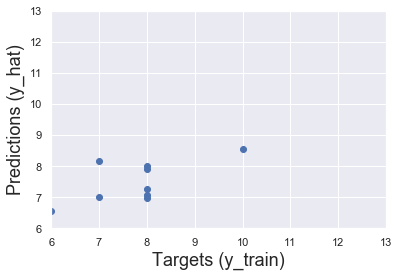

In [54]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### Residual (Difference y_train - y_dach)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

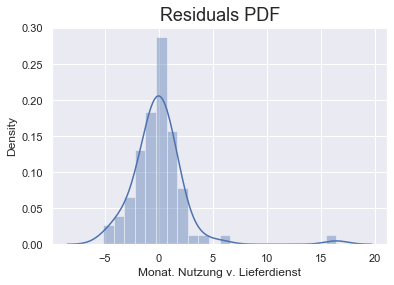

In [55]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

- If y_train - y_hat is much lower than the mean (there are many negative values), a much higher price is predicted than is observed (Over-Estimated the Target)

- If y_train - y_hat is much higher than the mean (there are many positive values), a much lower price is predicted than is observed (Under-Estimated the Target)

### e) R^2

In [56]:
reg.score(x_train, y_train)

0.550525554317121

## 6. Finding Weights & Bias

In [57]:
reg.intercept_

3.1305923054685794

In [58]:
reg.coef_

array([ 0.16456743,  0.37973585,  0.49029121,  0.22338148, -0.07452902,
        0.72718676,  1.18002021, -0.89717297, -0.2172917 , -0.83321089,
       -0.42755379,  1.66419976,  0.62187498,  1.05650912,  0.55449459,
        0.75041902,  0.86676733,  0.08682797,  1.44802933, -0.12235897,
       -0.8137192 , -0.24785424,  0.69992664,  0.81521386,  2.94601343,
        1.18439831,  1.18869731,  2.67718695,  0.85993286,  0.36978361,
       -0.21989533,  0.15411322,  0.88474016, -0.77486388, -0.64208952,
        0.28068977,  0.3399056 , -0.84183606,  1.23833686,  0.19837232,
       -0.21781212,  0.04418228, -0.44059821, -0.8624371 , -1.95173898,
       -0.89251255])

In [59]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary.sort_values("Weights", ascending= False)

,Features,Weights
24,Beschäftigungsstatus: Schüler/Student,2.946013
27,Beschäftigungsstatus: Vollzeit angestellt,2.677187
11,Häufiger Essenbestellung seit Homeoffice,1.664200
18,Abschluss: abgeschlossene Berufsausbildung,1.448029
38,Bestellen per Website,1.238337
26,Beschäftigungsstatus: Teilzeit angestellt,1.188697
25,Beschäftigungsstatus: Selbstständig,1.184398
6,Grund Lieferdienst: große Essenauswahl,1.180020
13,Abschluss: Bachelor,1.056509
32,Bestellen per Telefon,0.884740


### Make Odds Ratio

In [61]:
reg_summary["Odds Ratio"] = np.exp(reg_summary.Weights)

reg_summary.sort_values("Odds Ratio", ascending = False)

,Features,Weights,Odds Ratio
24,Beschäftigungsstatus: Schüler/Student,2.946013,19.029938
27,Beschäftigungsstatus: Vollzeit angestellt,2.677187,14.544122
11,Häufiger Essenbestellung seit Homeoffice,1.664200,5.281445
18,Abschluss: abgeschlossene Berufsausbildung,1.448029,4.254722
38,Bestellen per Website,1.238337,3.449871
26,Beschäftigungsstatus: Teilzeit angestellt,1.188697,3.282802
25,Beschäftigungsstatus: Selbstständig,1.184398,3.268719
6,Grund Lieferdienst: große Essenauswahl,1.180020,3.254440
13,Abschluss: Bachelor,1.056509,2.876313
32,Bestellen per Telefon,0.884740,2.422355


##### A Feature is NOT particularly IMPORTANT if:
- Its coefficient is around 0
- Its odds ratio is around 1 (For a uni change in the standardized feature, the odds increase by a multilpe equal to the odds ratio (1= no change))

Beispiel: Beshcäftigungsstatus: Student/Schüler : For a unit change, it is 19 times MORE LIKELY that a person will use online food delivery service per month.